In [122]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import spectral_clustering
from sklearn.feature_extraction import image

In [8]:
# we are going to create an image and add noise to that image
# this is going to be an 100x100 image
# np.indices : get the position of each coordinate
l = 100
x,y = np.indices((l,l))

In [9]:
x

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  1, ...,  1,  1,  1],
       [ 2,  2,  2, ...,  2,  2,  2],
       ...,
       [97, 97, 97, ..., 97, 97, 97],
       [98, 98, 98, ..., 98, 98, 98],
       [99, 99, 99, ..., 99, 99, 99]])

In [10]:
y

array([[ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       ...,
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99],
       [ 0,  1,  2, ..., 97, 98, 99]])

In [78]:
center1 = (28,24)
center2 = (40,50)
center3 = (67,58)
center4 = (24,70)
center5 = (61,27)

radius1, radius2, radius3, radius4, radius5 = 16,14,15,14,17

In [81]:
# to check if a pixel is inside a circle or outside of a circle
circle1 = (x - center1[0])**2 + ( y - center1[1])**2 < radius1**2 
circle2 = (x - center2[0])**2 + ( y - center2[1])**2 < radius2**2 
circle3 = (x - center3[0])**2 + ( y - center3[1])**2 < radius3**2 
circle4 = (x - center4[0])**2 + ( y - center4[1])**2 < radius4**2 
circle5 = (x - center5[0])**2 + ( y - center5[1])**2 < radius5**2 

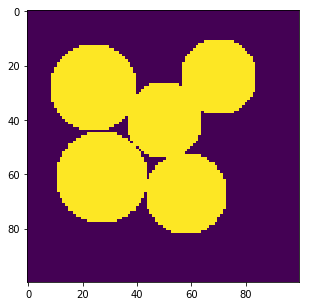

In [82]:
img = circle1 + circle2 + circle3 + circle4 + circle5

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.show()

In [83]:
mask = img.astype(bool)

img = img.astype(float)

mask.shape, img.shape

((100, 100), (100, 100))

In [84]:
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [85]:
# now img is float values
img

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

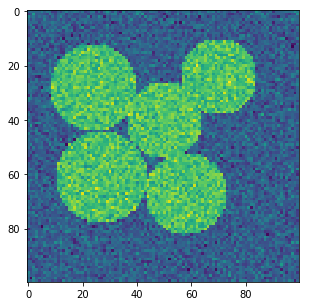

In [86]:
#adding some random noise
img += 1 + 0.2 * np.random.randn(*img.shape)
plt.figure(figsize=(12,5))
plt.imshow(img)
plt.show()

In [90]:
# img_to_graph : geenrates pixel to pixel gradient connections in an image
# The output is a sparse matrix
graph = image.img_to_graph(img, mask=mask)
print(graph)

  (0, 1)	0.043528949465324374
  (1, 2)	0.33113814503954386
  (2, 3)	0.5600245473143424
  (3, 4)	0.41162982506189794
  (4, 5)	0.24940236732273968
  (5, 6)	0.21175430507194593
  (6, 7)	0.5945133554872868
  (7, 8)	0.5521133686710185
  (8, 9)	0.06257864939150548
  (9, 10)	0.2392128951028043
  (11, 12)	0.2030182115662984
  (12, 13)	0.2520985400650839
  (13, 14)	0.2489527979455144
  (14, 15)	0.4822637792567026
  (15, 16)	0.05011958351636148
  (16, 17)	0.38004363250606343
  (17, 18)	0.11534668006491722
  (18, 19)	0.06540313908692585
  (19, 20)	0.16378853153778827
  (20, 21)	0.16279304544988493
  (21, 22)	0.061283945718300536
  (22, 23)	0.2725012903809527
  (23, 24)	0.5446739437739225
  (24, 25)	0.6061626135653242
  (26, 27)	0.05038426521327288
  :	:
  (3542, 3542)	1.7488249552754636
  (3543, 3543)	2.001431676578556
  (3544, 3544)	1.5970734730727991
  (3545, 3545)	1.8511723191006764
  (3546, 3546)	1.8609207600017394
  (3547, 3547)	2.0934696295533737
  (3548, 3548)	1.6909840727737475
  (3549, 3

In [91]:
graph.shape

(3567, 3567)

In [92]:
graph.data

array([0.04352895, 0.33113815, 0.56002455, ..., 1.86418564, 1.97374977,
       1.82957408])

In [124]:
labels = spectral_clustering(graph, n_clusters=5)

In [125]:
labels

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

In [128]:
# in order to display the clusters in our image, we need to create an array of -1s with the same shape of img
label_im = -np.ones(img.shape)
label_im

array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       ...,
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

In [130]:
label_im[mask] = labels
label_im[mask]

array([3., 3., 3., ..., 0., 0., 0.])

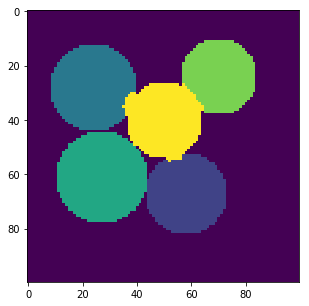

In [131]:
plt.figure(figsize=(12,5))
plt.imshow(label_im)
plt.show()